In [2]:
# Parameters
h5_name = '{PATH_TO_CATATAC_5_CRISPR9_ONLY_SINGLETS_H5SEURAT}'
protosp_path = '{PATH_TO_PROTOSPACERS_4SET_TSV}'
library = "CRISPR9"
tsv_path = '{PATH_TO_TSV}'


In [3]:
library(Seurat)
library(SeuratDisk)
library(dplyr)
library(ggplot2)
library(patchwork)
library(stringr)
library(crayon)

Error in .make_numeric_version(x, strict, .standard_regexps()$valid_numeric_version) : 
  invalid non-character version specification 'x' (type: double)


Attaching SeuratObject

Attaching sp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘crayon’


The following object is masked from ‘package:ggplot2’:

    %+%




In [4]:
#setwd("~/prj/catatac/scripts")

# Load guide-capture data

Define paths etc

In [5]:
# Pass these as parameters
# h5_name = '{PATH_TO_CATATAC_4_CRISPR8_ONLY_SINGLETS_H5SEURAT}'
# protosp_path = '{PATH_TO_PROTOSPACERS_4SET_TSV_2}'
# library = "CRISPR8"
# tsv_path = '{PATH_TO_TSV_2}'


In [6]:
h5_w_gcap_name <- sub(".h5seurat", "_w_GUIDE_CAP.h5seurat", h5_name)  #changed to by_guide
barcode2guide_tsv_path <- paste0(tsv_path, '{PATH_TO_LIBRARY_ALL_STRUCTURED_TSV}')
tsv_name <- paste0(tsv_path, '{PATH_TO_LIBRARY_PIVOT_TSV}')

### Load protospacer file

In [7]:
df_protosp = read.table(protosp_path, header=TRUE, comment.char="")

In [8]:
tfs_w_ntctl    = unique(df_protosp$X.TargetGene)
unselect_ntctl = (tfs_w_ntctl != "NTCTL") & (tfs_w_ntctl != "NTCTRL")
tfs_to_plot    = tfs_w_ntctl[unselect_ntctl]

guides_to_plot  = df_protosp$GuideName
tfs_to_plot
guides_to_plot

[1] "GATA5"   "MEOX1"   "NEUROG2"

[1] "GATA5_1"   "GATA5_2"   "MEOX1_1"   "MEOX1_2"   "NEUROG2_1" "NEUROG2_2"
[7] "NTCTL_1"   "NTCTL_2"

In [9]:
df_protosp

X.TargetGene,GuideName,Protospacer
<chr>,<chr>,<chr>
GATA5,GATA5_1,GCTGACCCTGCGGGGAAGAA
GATA5,GATA5_2,GTCGCCAAGCCCCGCGAGCA
MEOX1,MEOX1_1,GCATCAAATGCCAAATTCCA
MEOX1,MEOX1_2,GCTGAAGTGAAATGTGAGAG
NEUROG2,NEUROG2_1,GGGAGCTGGCGAAGCCGCAG
NEUROG2,NEUROG2_2,GGGAAAGGCGGTGAAGAAAG
NTCTL,NTCTL_1,GTGTCGTGATGCGTAGACGG
NTCTL,NTCTL_2,GTCATCAAGGAGCATTCCGT


In [10]:
#c("OTP", "MYF6", "MEIS1", "FLI1", "HHEX", "HOXA6", "ELF5", "GBX1", "DPRX", "NTCTL")
##!! tf_list   <- tfs_w_ntctl 

df_guide <- read.table(tsv_name, header = TRUE, sep = "\t", quote = "")
tf_list  <- intersect(guides_to_plot, colnames(df_guide))    ##changed guides_to_plot to tfs_to_plot

guide_counts  <- t(data.matrix(df_guide[,tf_list]))
colnames(guide_counts) <- df_guide$barcode_dash
guide_counts

,AAACAGCCAAACATAG-1,AAACAGCCAAACGCGA-1,AAACAGCCAAAGCGCA-1,AAACAGCCAAATATCC-1,AAACAGCCAAATTGCT-1,AAACAGCCAACTAGAA-1,AAACAGCCAACTGGCT-1,AAACAGCCAATAGCCC-1,AAACAGCCAATATACC-1,AAACAGCCAATCCTAG-1,⋯,TTTGTTGGTTAGCGTA-1,TTTGTTGGTTAGTACG-1,TTTGTTGGTTCACCAT-1,TTTGTTGGTTCGCTCA-1,TTTGTTGGTTCTTTAG-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTGTCCAT-1,TTTGTTGGTTTACCGT-1,TTTGTTGGTTTGCGCC-1,TTTGTTGGTTTGTCTA-1
GATA5_1,18,2,0,0,0,8,6,8,0,0,⋯,2,0,0,2,0,0,2,0,0,0
GATA5_2,0,0,0,0,0,11,0,13,0,0,⋯,9,0,0,7,0,0,0,0,2,0
MEOX1_1,0,23,12,11,18,25,0,0,3,15,⋯,11,2,0,0,9,14,0,0,0,2
MEOX1_2,0,8,0,24,0,0,0,0,0,0,⋯,0,3,12,0,0,0,0,0,0,0
NEUROG2_1,54,2,0,0,10,15,6,0,0,0,⋯,17,0,0,0,0,0,0,9,2,21
NEUROG2_2,0,16,15,0,0,6,0,5,1,0,⋯,4,0,0,0,6,7,9,0,0,0
NTCTL_1,0,0,0,0,0,0,0,0,0,0,⋯,11,0,0,0,0,0,0,32,0,0
NTCTL_2,0,0,0,0,0,0,0,12,6,0,⋯,0,11,0,0,0,0,0,0,0,0


In [11]:
#df_guide <- select(df_guide, -na)
df_guide

barcode,n_guides,GATA5_1,GATA5_2,MEOX1_1,MEOX1_2,NEUROG2_1,NEUROG2_2,NTCTL_1,NTCTL_2,barcode_dash,in_multiome
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<lgl>
AAACAGCCAAACATAG,72,18,0,0,0,54,0,0,0,AAACAGCCAAACATAG-1,FALSE
AAACAGCCAAACGCGA,51,2,0,23,8,2,16,0,0,AAACAGCCAAACGCGA-1,FALSE
AAACAGCCAAAGCGCA,27,0,0,12,0,0,15,0,0,AAACAGCCAAAGCGCA-1,FALSE
AAACAGCCAAATATCC,35,0,0,11,24,0,0,0,0,AAACAGCCAAATATCC-1,FALSE
AAACAGCCAAATTGCT,28,0,0,18,0,10,0,0,0,AAACAGCCAAATTGCT-1,FALSE
AAACAGCCAACTAGAA,65,8,11,25,0,15,6,0,0,AAACAGCCAACTAGAA-1,FALSE
AAACAGCCAACTGGCT,12,6,0,0,0,6,0,0,0,AAACAGCCAACTGGCT-1,FALSE
AAACAGCCAATAGCCC,38,8,13,0,0,0,5,0,12,AAACAGCCAATAGCCC-1,FALSE
AAACAGCCAATATACC,10,0,0,3,0,0,1,0,6,AAACAGCCAATATACC-1,FALSE


Get overlapping cells

In [12]:
N_MIN_GUIDES <- 10            ##default is 10
select_overlapping   <-
    df_guide$in_multiome & (df_guide$n_guide >= N_MIN_GUIDES)

overlapping_barcodes <- df_guide[select_overlapping, ]$barcode_dash
overlapping_barcodes <- as.vector(overlapping_barcodes)

overlapping_guide_counts <- guide_counts[, overlapping_barcodes]

n_all_overlapping <- nrow(df_guide[df_guide$in_multiome, ])
paste("Overlapping barcodes w/ min guides =", N_MIN_GUIDES,": ", length(overlapping_barcodes))
paste("Overlapping barcodes w/ min guides =", 1,": ", n_all_overlapping)


[1] "Overlapping barcodes w/ min guides = 10 :  6656"

[1] "Overlapping barcodes w/ min guides = 1 :  6774"

In [13]:
head(overlapping_guide_counts)

,AAACAGCCACAACAGG-1,AAACAGCCACCACAAC-1,AAACAGCCAGGGAGGA-1,AAACAGCCATAGGCGA-1,AAACAGCCATCCGTAA-1,AAACAGCCATTGTGCA-1,AAACATGCAACACTTG-1,AAACATGCAGCACGAA-1,AAACATGCAGGACACA-1,AAACATGCAGTAAAGC-1,⋯,TTTGTGGCAATAGCAA-1,TTTGTGGCAGTTTCTC-1,TTTGTGGCATAACGGG-1,TTTGTGGCATGATTGT-1,TTTGTGTTCCCTCAGT-1,TTTGTGTTCTCCATGC-1,TTTGTTGGTCAAAGAA-1,TTTGTTGGTCTAACAG-1,TTTGTTGGTGTGAGGA-1,TTTGTTGGTTTACCGT-1
GATA5_1,24,12,0,47,20,0,0,19,0,0,⋯,5,7,97,0,180,0,0,2,17,0
GATA5_2,8,0,0,0,0,0,8,17,18,0,⋯,0,8,28,4,25,0,0,0,38,0
MEOX1_1,6,0,45,34,20,94,11,0,23,238,⋯,469,12,1,8,20,33,5,2,9,0
MEOX1_2,0,0,0,0,48,1,0,0,0,129,⋯,170,0,6,0,0,0,0,0,0,0
NEUROG2_1,49,9,8,33,18,9,36,80,0,8,⋯,0,17,17,0,14,0,0,9,0,9
NEUROG2_2,39,0,19,0,21,27,104,38,7,4,⋯,5,3,0,0,0,0,9,7,0,0


In [14]:
head(overlapping_barcodes)

[1] "AAACAGCCACAACAGG-1" "AAACAGCCACCACAAC-1" "AAACAGCCAGGGAGGA-1"
[4] "AAACAGCCATAGGCGA-1" "AAACAGCCATCCGTAA-1" "AAACAGCCATTGTGCA-1"

## Plot stats

In [15]:
#head(df_guide_counts_per_cell)

Median #guides per cell 110

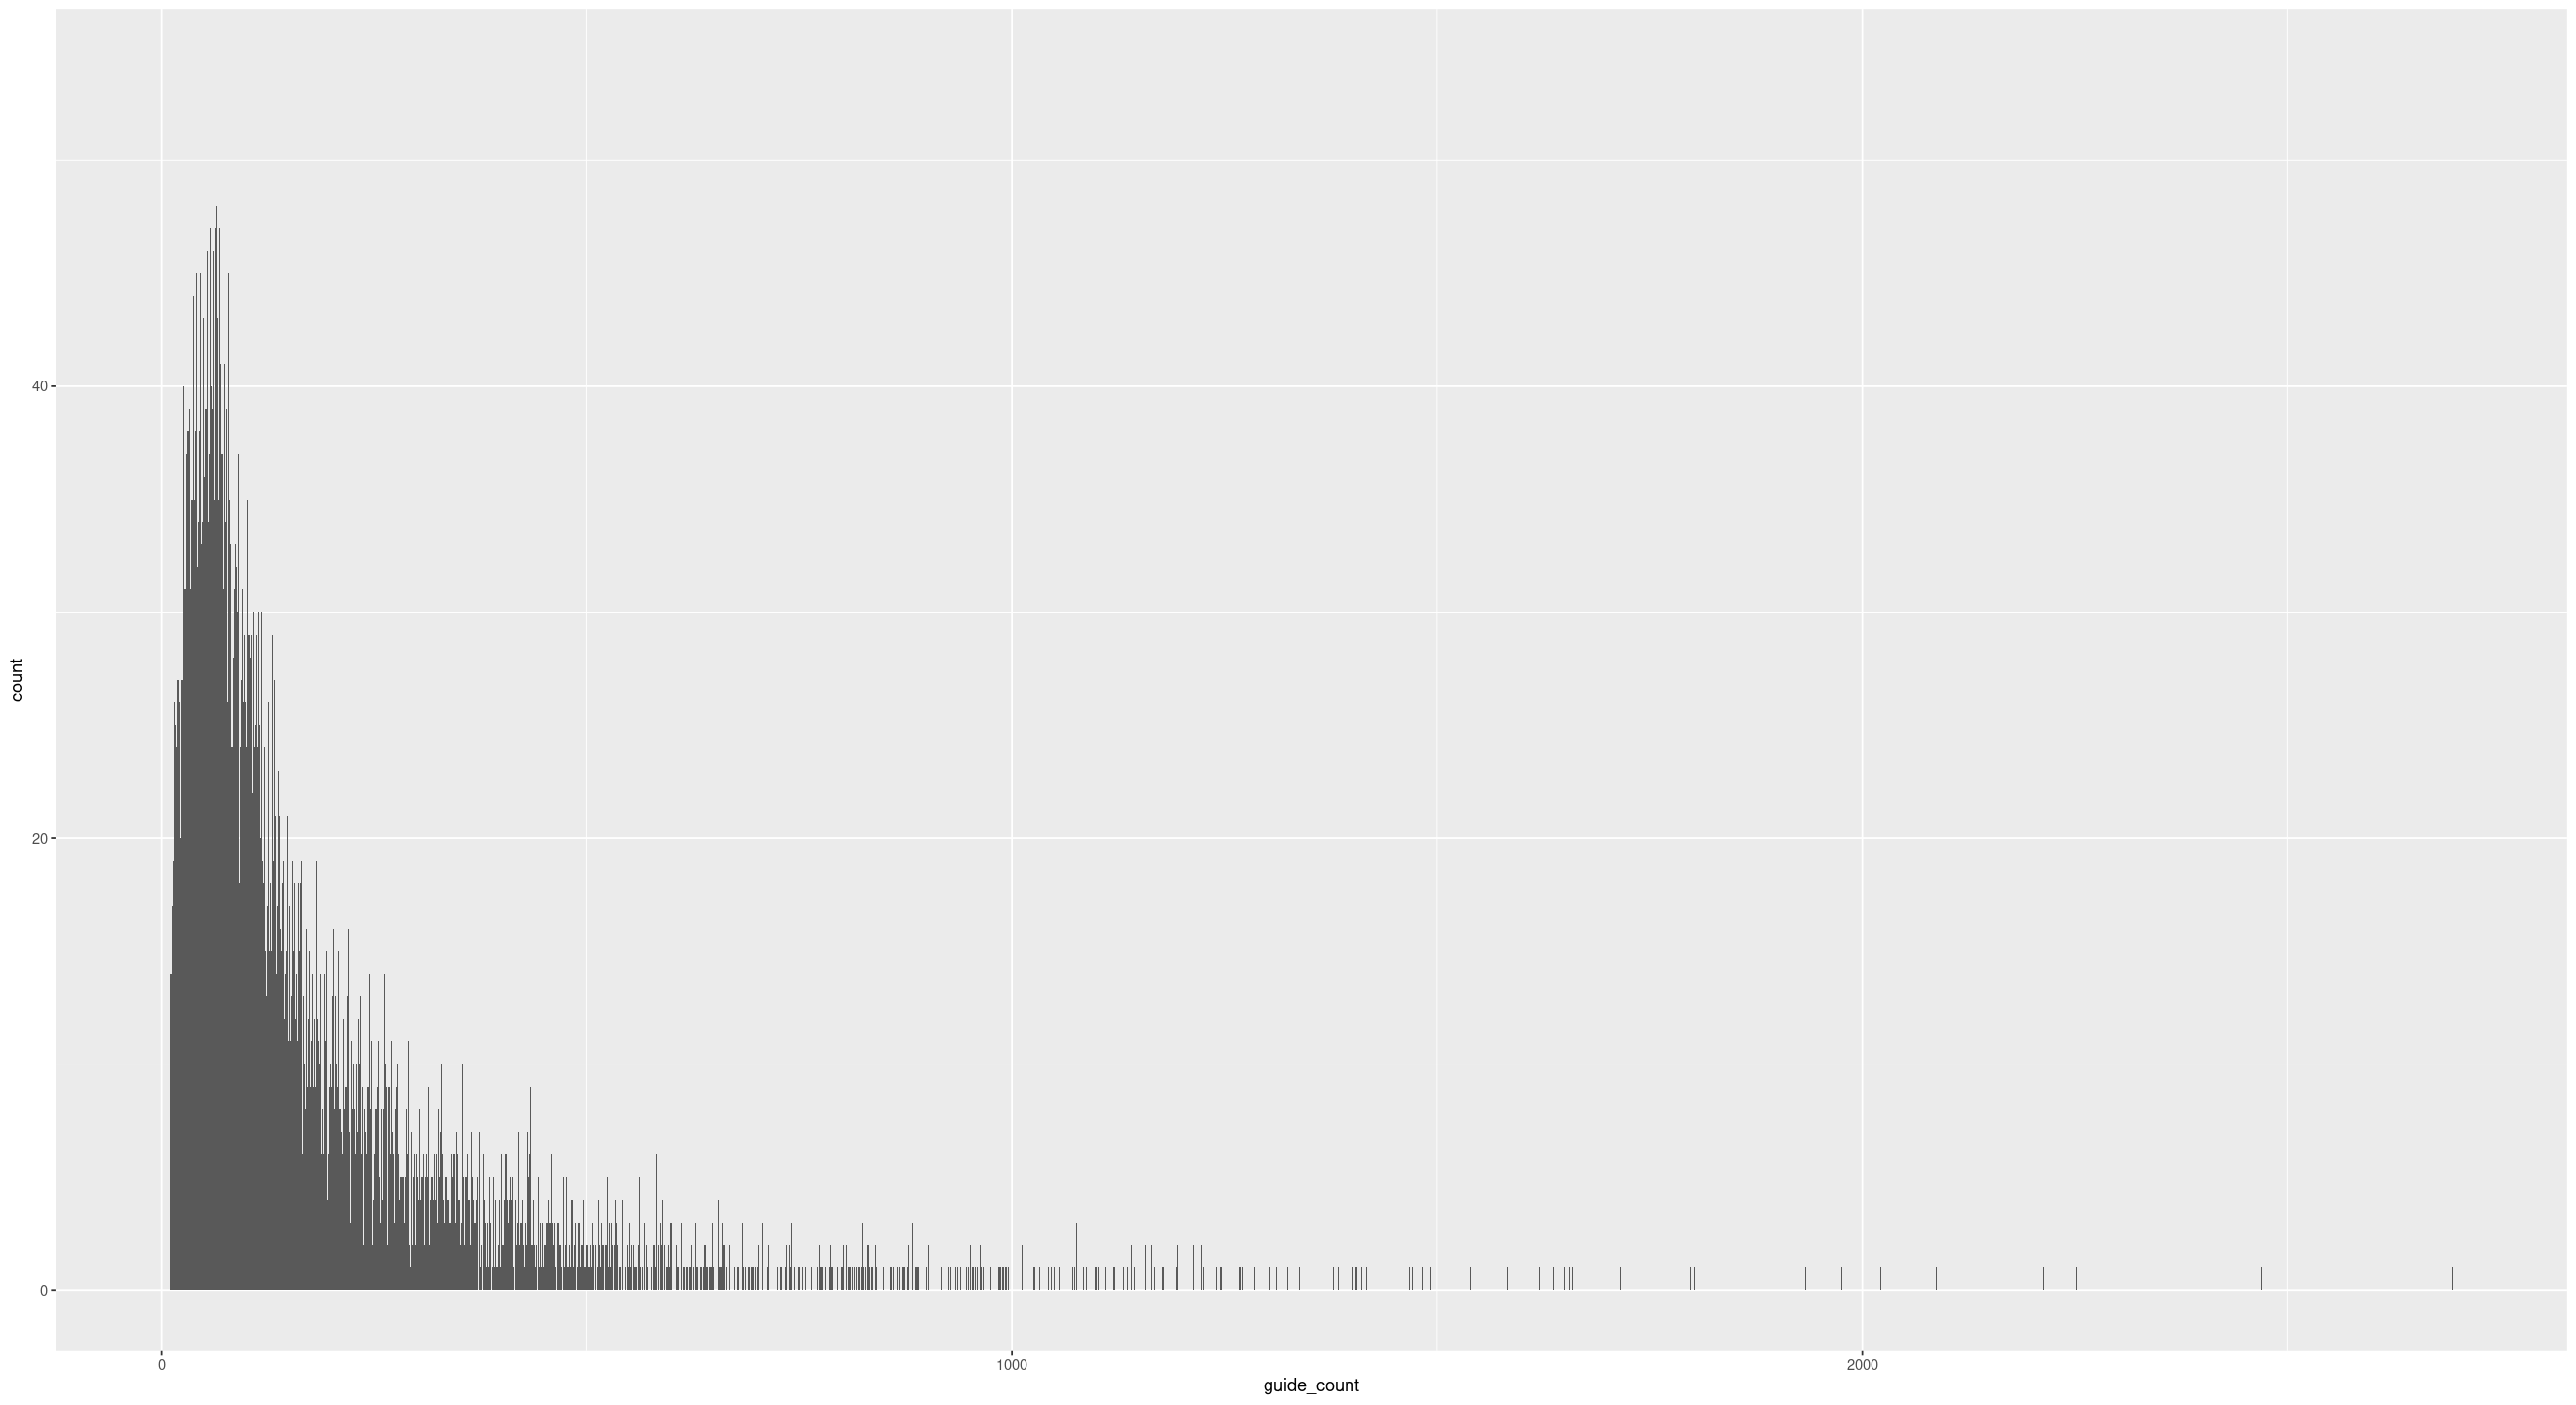

In [16]:
df_guide_counts_per_cell <- data.frame(guide_count=colSums(overlapping_guide_counts))
median_guides_per_cell = median(df_guide_counts_per_cell$guide_count)
cat(blue("Median #guides per cell"), median_guides_per_cell)

ggplot(df_guide_counts_per_cell, aes(x=guide_count)) +
    geom_histogram(binwidth=1)

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

No id variables; using all as measure variables



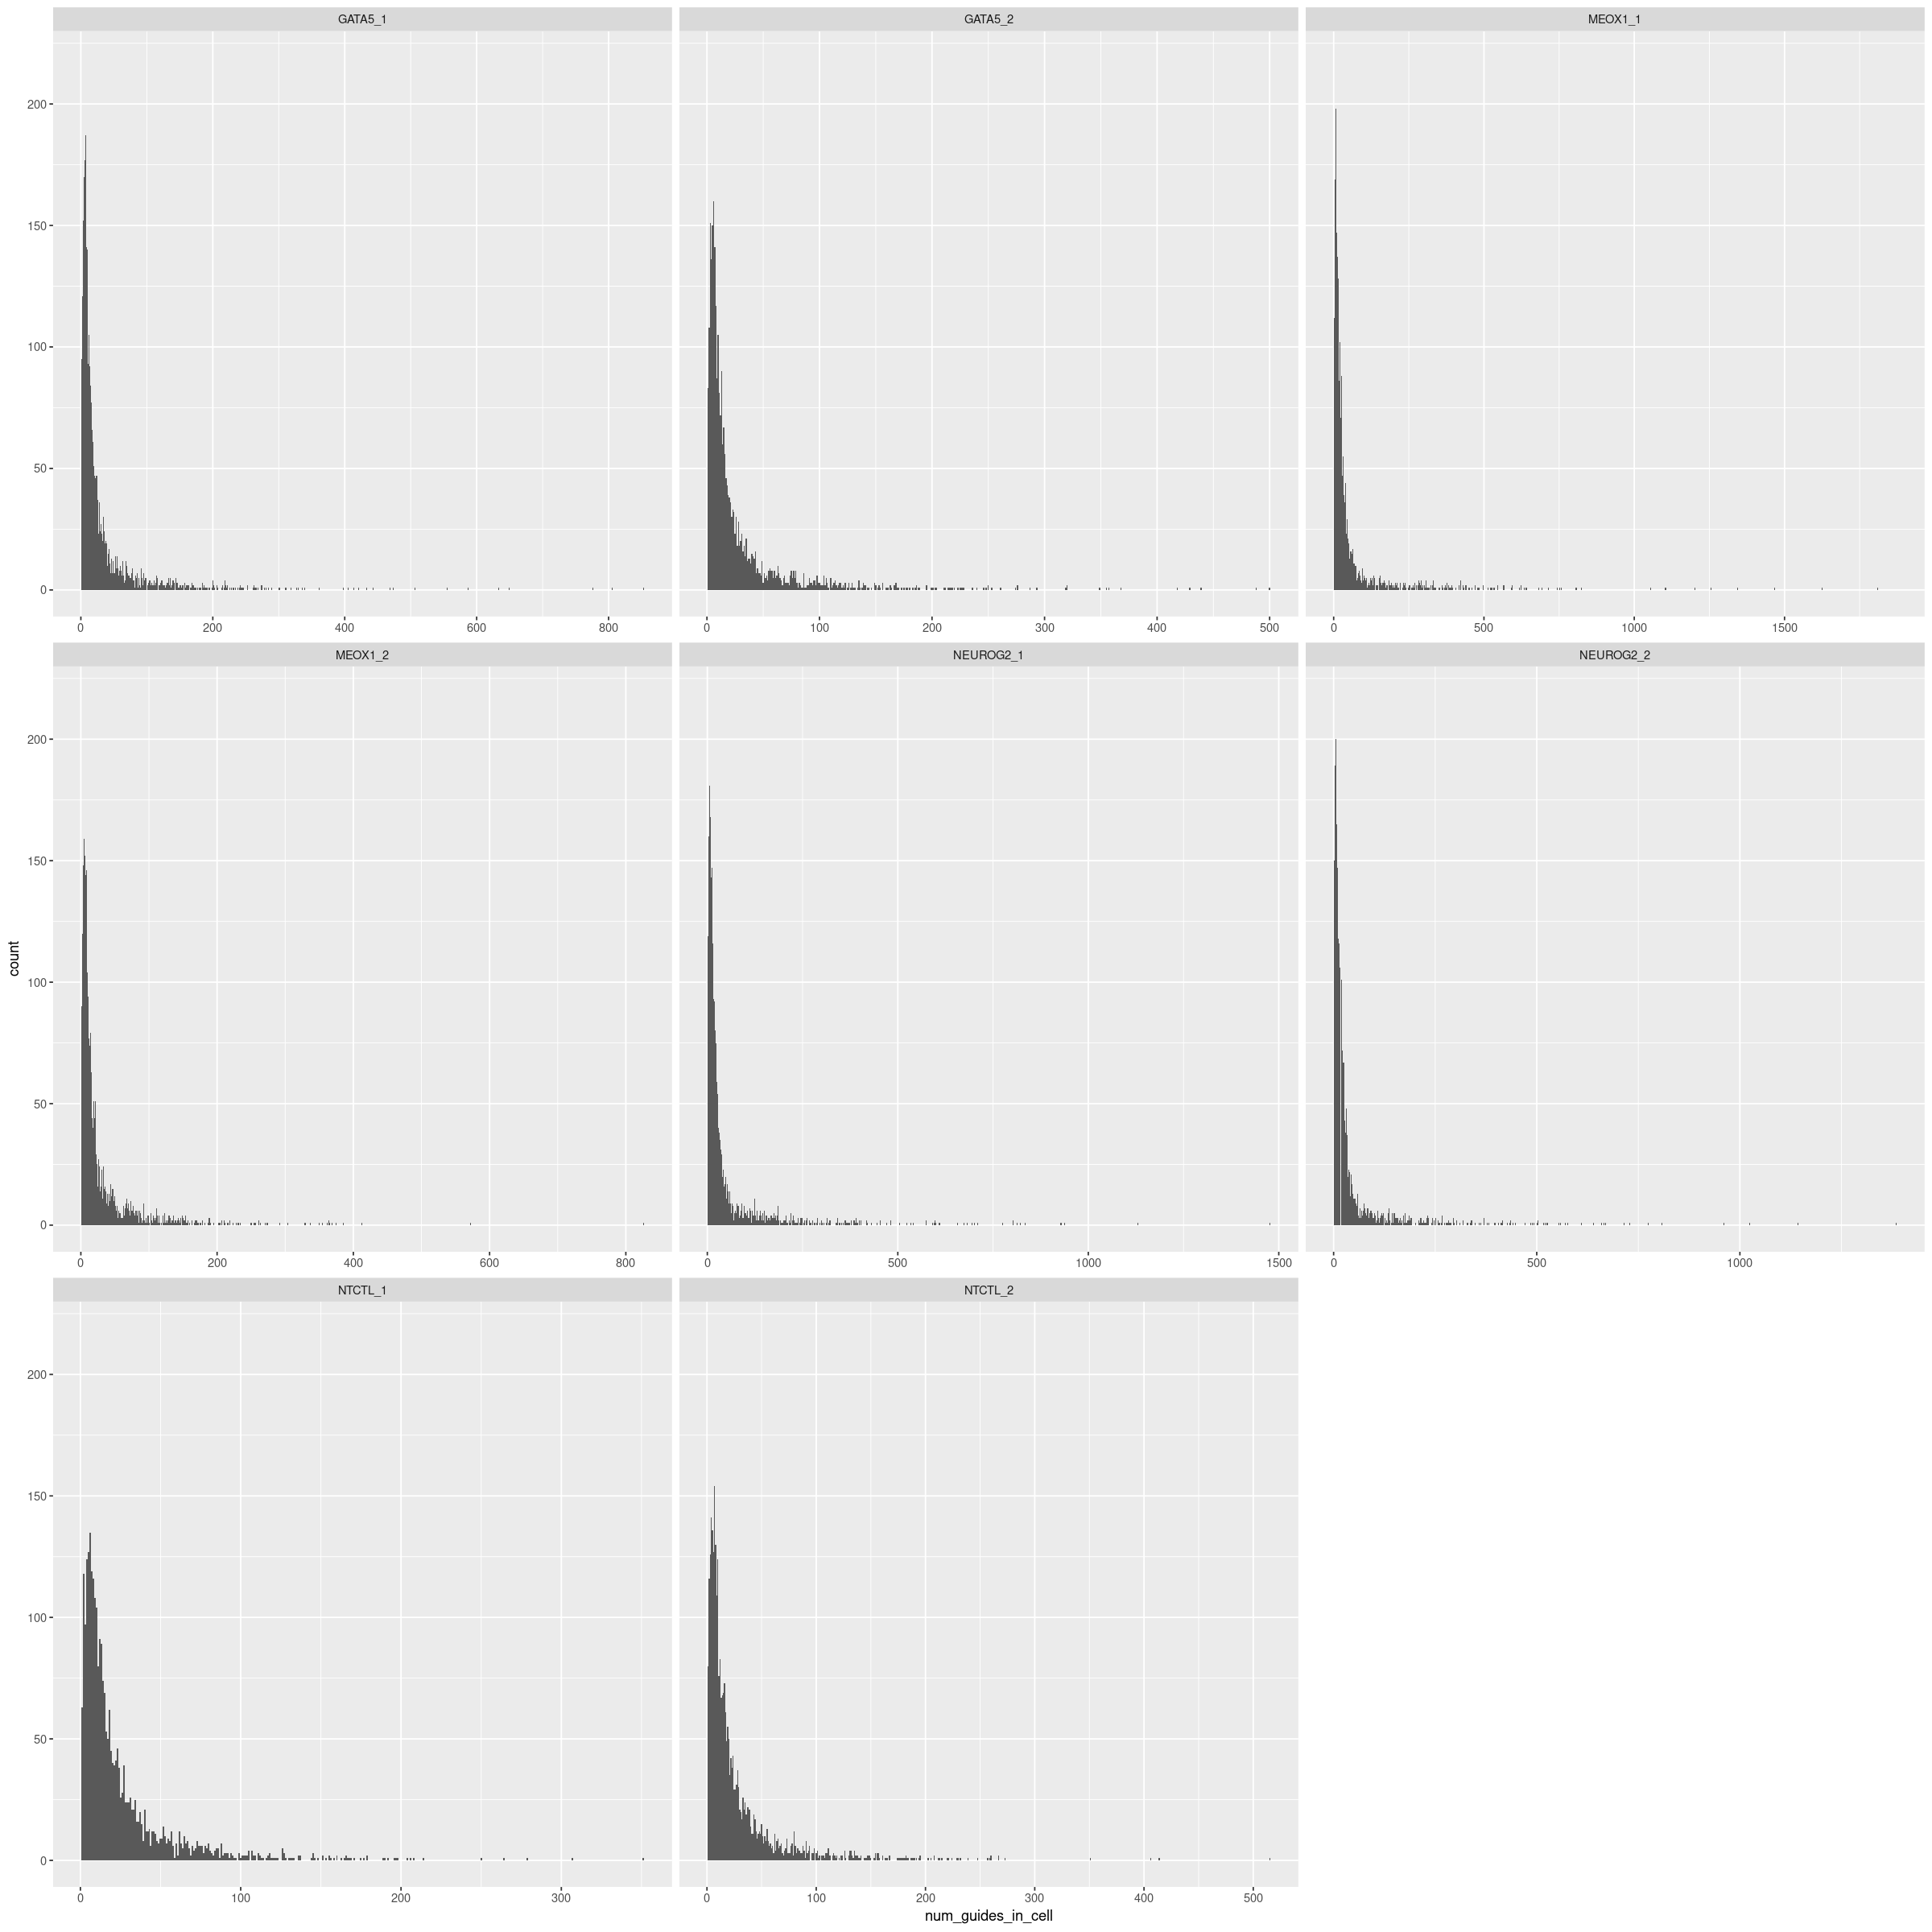

In [17]:
library(reshape2)
df_guide_counts_by_cell <- as.data.frame(t(overlapping_guide_counts))

d <- melt(df_guide_counts_by_cell)
d <- d[d$value > 0,]
colnames(d) = c("guide_name", "num_guides_in_cell")

options(repr.plot.width = 20, repr.plot.height = 20)
ggplot(d, aes(x = num_guides_in_cell)) + 
    facet_wrap(~guide_name, scales = "free_x") + 
    geom_histogram(binwidth=1) +
    labs(y_label="count") 

No id variables; using all as measure variables

Warning message:
“Ignoring unknown parameters: bin_breaks”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



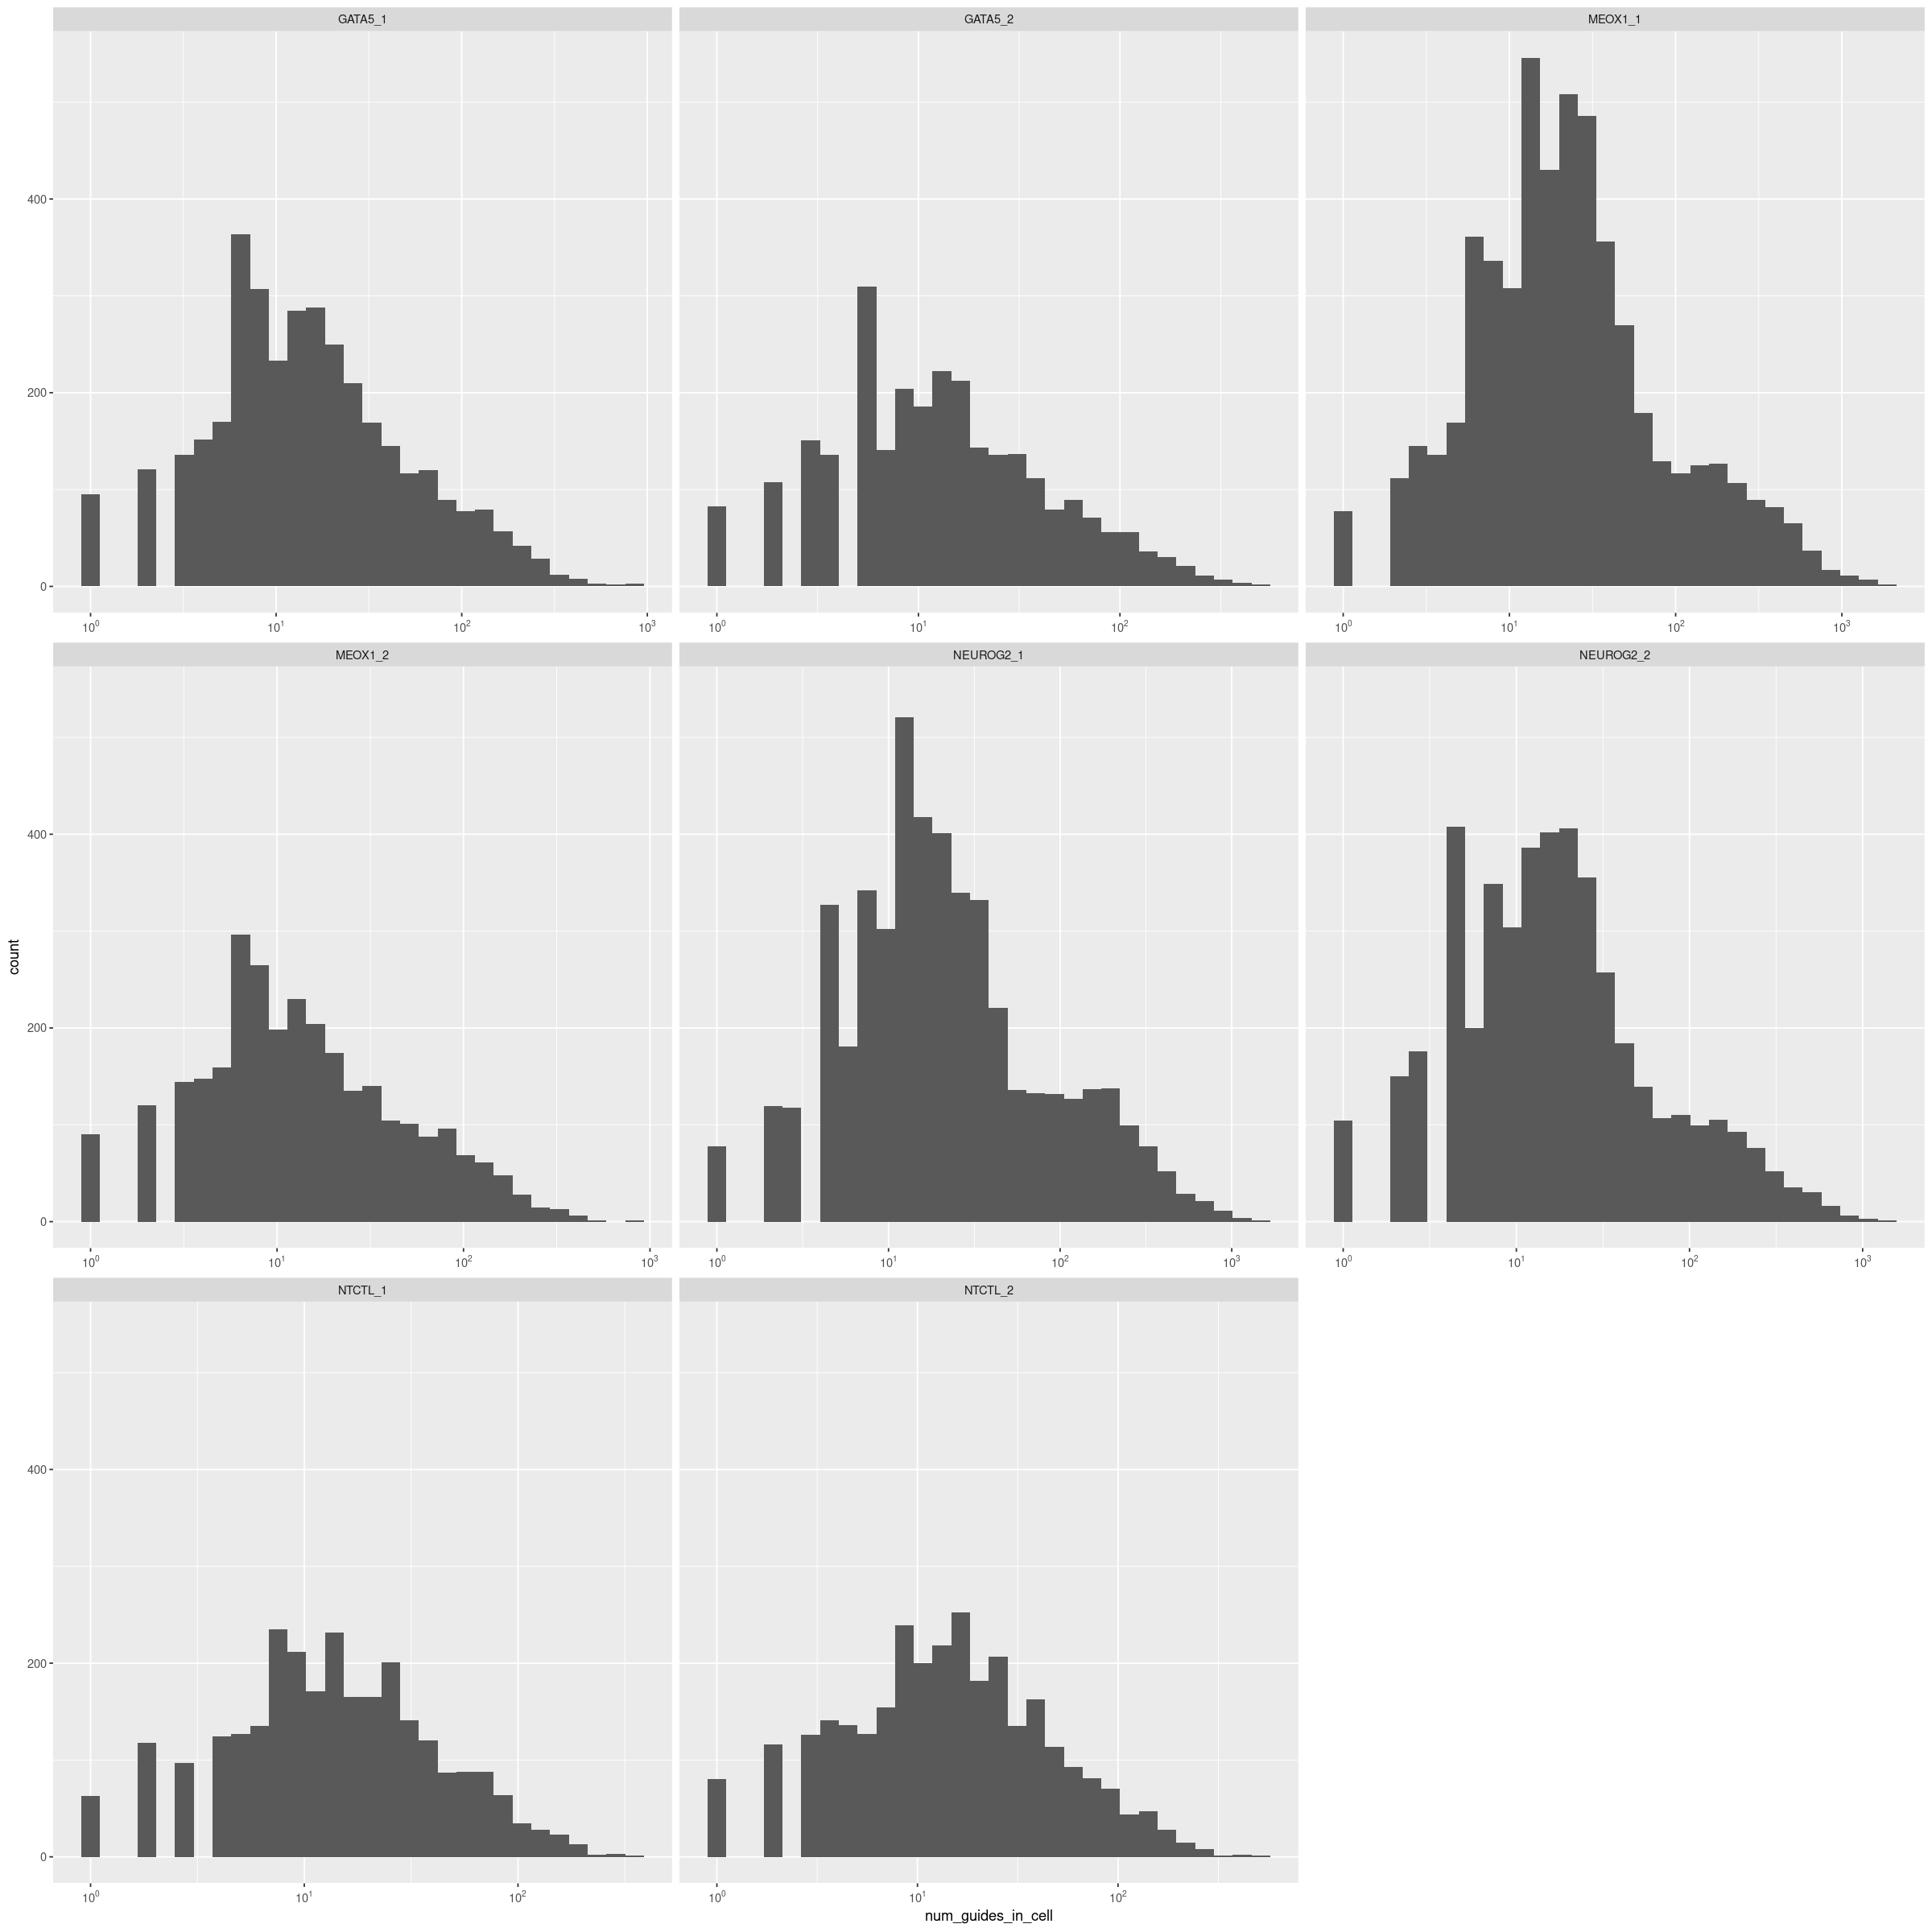

In [18]:
### Using log scales
library(reshape2)
library(scales)
df_guide_counts_by_cell <- as.data.frame(t(overlapping_guide_counts))

d <- melt(df_guide_counts_by_cell)
d <- d[d$value > 0,]
colnames(d) = c("guide_name", "num_guides_in_cell")

bin_breaks <- c(1,2,2*2^(1:16))

options(repr.plot.width = 20, repr.plot.height = 20)
ggplot(d, aes(x = num_guides_in_cell)) + 
    facet_wrap(~guide_name, scales = "free_x") + 
    geom_histogram(bin_breaks=bin_breaks) +
    scale_x_log10(labels=trans_format('log10',math_format(10^.x)), breaks=c(1,10,100,1000,10000,100000)) +
    labs(y_label="count") 

# Demux

Load multiome seurat object

In [20]:
if (!exists("seurat_all")) {
    seurat_all <- LoadH5Seurat(h5_name, verbose=FALSE)
}

Validating h5Seurat file



ERROR: Error in validityMethod(as(object, superClass)): object 'Dim_validate' not found


In [21]:
# Select cells found in guide capture
seurat     <- subset(seurat_all, cells = overlapping_barcodes)
n_multiome <- length(Cells(seurat_all))

ERROR: Error in eval(expr, envir, enclos): object 'seurat_all' not found


In [ ]:
# Add guide data as a new assay independent from RNA & ATAC
seurat[["guidecapture"]] <- CreateAssayObject(counts = overlapping_guide_counts)

In [ ]:
# x <- GetAssayData(seurat, "counts")
# cells <- colnames(x[ , colSums(x) != 0])
# feats <- names((rowSums(x) != 0) == TRUE)
# seurat <- seurat[feats, cells] 

In [ ]:
# Normalize guide data, here we use centered log-ratio (CLR) transformation
seurat <- NormalizeData(seurat, assay = "guidecapture", normalization.method = "CLR", margin = 1)

In [ ]:
seurat <- HTODemux(seurat, assay = "guidecapture", kfunc = "kmeans", positive.quantile = 0.99)

In [ ]:
unique(seurat$guidecapture_secondID)

In [ ]:
head(seurat)

# Visualize

In [ ]:
if (!exists("seurat")) {
    seurat <- LoadH5Seurat(h5_w_gcap_name)
}

In [ ]:
# Global classification results
n_cells <- length(seurat$guidecapture_classification.global)
demux_counts      <- table(seurat$guidecapture_classification.global)
demux_percentages <- round(demux_counts/n_cells, 2)

demux_counts
demux_percentages

n_doublets <- demux_counts[["Doublet"]]
n_singlets <- demux_counts[["Singlet"]]

# capture_efficiency_1 <- 100*(n_doublets + n_singlets) / n_multiome
# paste("Capture efficiency% = ", round(capture_efficiency_1), "( norm by", n_multiome, ")")

capture_efficiency_2 <- 100 * (n_doublets + n_singlets) / n_all_overlapping
paste("Capture efficiency%", round(capture_efficiency_2), "( norm by", n_all_overlapping, ")")

In [ ]:
demux_df <- as.data.frame(demux_counts)
demux_df

In [ ]:
demux_df$Exp <- c("K562_rep2")
colnames(demux_df) <- c("Type", "Freq", "Exp")
demux_df

In [ ]:
#Plot stacked bargraph for percentages
options(repr.plot.width = 5, repr.plot.height = 7)
demux_df$Type <- factor(demux_df$Type, levels = c("Negative", "Doublet", "Singlet"))
ggplot(demux_df, aes(fill=Type, y=Freq, x=Exp)) + geom_bar(position="fill", stat="identity", width=0.2) +
    ggtitle("Guide Assignment") +
    scale_fill_brewer(palette = "Set3") +
    theme(text = element_text(size = 20))


In [ ]:
length(Cells(seurat))

In [ ]:
head(seurat)

In [ ]:
# Group cells based on the max HTO signal
guide_names <- rownames(seurat[["guidecapture"]])
num_pcs     <- length(guide_names)

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)
tf_list <- tfs_to_plot

Idents(seurat) <- "guidecapture_classification"

RidgePlot(
    seurat,
    assay = "guidecapture",
    features = guide_names,
    slot="counts",
    ncol = 4
) + plot_annotation(title = "Raw guide counts") & theme(plot.title = element_text(hjust = 0.5, size = 20))

RidgePlot(
    seurat,
    assay = "guidecapture",
    features = guide_names,
    ncol = 4
) + plot_annotation(title = "Normalized guide counts") & theme(plot.title = element_text(hjust = 0.5, size = 20))

RidgePlot(
    seurat,
    assay = "SCT",
    features = tf_list,
    ncol = 4,
    y.max = .5
)+ plot_annotation(title = "Normalized transcript counts") & theme(plot.title = element_text(hjust = 0.5, size = 20))

In [ ]:
VlnPlot(
    seurat,
    assay = "guidecapture",
    features = guide_names,
    slot="counts",
    ncol = 4
) + plot_annotation(title = "Raw guide counts", 
                    theme = theme(plot.title = element_text(hjust = 0.5, size = 20)))


In [ ]:
# FeatureScatter(seurat, feature1 = "GATA5", feature2 = "MEOX1")
# FeatureScatter(seurat, feature1 = "GATA5", feature2 = "NEUROG2")
# FeatureScatter(seurat, feature1 = "MEOX1", feature2 = "NEUROG2")

In [ ]:
Idents(seurat) <- "guidecapture_classification.global"
VlnPlot(seurat, features = "nCount_RNA", pt.size = 0.1, log = TRUE)

In [ ]:
# First, we will remove negative cells from the object
seurat_subset <- subset(seurat, idents = "Negative", invert = TRUE)

# Calculate a tSNE embedding of the HTO data
DefaultAssay(seurat_subset) <- "guidecapture"

In [ ]:

seurat_subset <-
    ScaleData(seurat_subset, features = guide_names, verbose = FALSE)

# seurat_subset <- RunPCA(
#     seurat_subset,
#     npcs = num_pcs,
#     ndims.print = 1:num_pcs,
#     features = guide_names,
#     approx = FALSE
# )

# seurat_subset <-
#     RunTSNE(
#         seurat_subset,
#         dims = 1:num_pcs,
#         perplexity = 100,
#         check_duplicates = FALSE
#     )

# seurat_subset <-
#     RunUMAP(seurat_subset, dims = 1:num_pcs)

#DimPlot(seurat_subset, reduction = "tsne")

# Figure 1E

In [ ]:
library(hrbrthemes)
library(viridis)
options(repr.plot.width = 10, repr.plot.height = 5)
HTOHeatmap(seurat, assay = "guidecapture") + theme(
    axis.text = element_text(size = 18, color = "black")) + scale_fill_viridis(discrete=FALSE)

In [ ]:
seurat[[]]

In [ ]:
# SaveH5Seurat(seurat, h5_w_gcap_name, overwrite = TRUE, verbose = FALSE)

# Inspect results

In [ ]:
# Label each cell with the number of guides detected in it by HTOdemux
seurat$perturb_targets_detected_in_cell <- colSums(sapply(seurat$guidecapture_classification, str_detect, tfs_w_ntctl))

In [ ]:
# Split the surat obj into singlets, doublets, negatives
# Singlets have only one target gene detected, but can have both guides targeting it.
seurat_negatives <- subset(seurat, idents = "Negative")
seurat_singlets  <- subset(seurat, perturb_targets_detected_in_cell == 1)
seurat_doublets  <- subset(seurat, perturb_targets_detected_in_cell > 1)

In [ ]:
# Assign the target gene name to singlets
x <- seurat_singlets$guidecapture_classification
target_assignments = sapply(tfs_w_ntctl, function(y) grep(y,x))

empty_vec = vector("character", length(x))
for(tf in names(target_assignments)) {
    indexes = target_assignments[[tf]]
    empty_vec[indexes] = tf
}

In [ ]:
Idents(seurat_singlets) <- empty_vec
Idents(seurat_doublets) <- seurat_doublets@meta.data$guidecapture_classification

### Singlets

In [ ]:
singlet_barcodes <- Cells(seurat_singlets)
select_singlets  <- df_guide$barcode_dash %in% singlet_barcodes
df_singlets      <- df_guide[select_singlets, ]

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 6)

plot_n_guides <- ggplot(df_singlets, aes(x = n_guides)) +
    geom_histogram(binwidth = 1) +
    labs(title = "Singlets, guide counts", x = "#guides captured") +
    labs(y = "#cells")

plot_dominant <- ggplot(df_singlets, aes(x = percent_dominant_gene)) +
    geom_histogram(binwidth = 1) +
    labs(title = "Singlets, %dominant gene", x = "%dominant gene") +
    labs(y = "#cells")

plot_n_guides 

### Negatives

In [ ]:
negative_barcodes <- Cells(seurat_negatives)
select_negatives  <- df_guide$barcode_dash %in% negative_barcodes
df_negatives      <- df_guide[select_negatives, ]

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 6)

plot_n_guides <- ggplot(df_negatives, aes(x = n_guides)) +
    geom_histogram(binwidth = 1) +
    labs(title = "Negatives, guide counts", x = "#guides captured") +
    labs(y = "#cells")

plot_dominant <- ggplot(df_negatives, aes(x = percent_dominant_gene)) +
    geom_histogram(binwidth = 1) +
    labs(title = "Negatives, %dominant gene", x = "%dominant gene") +
    labs(y = "#cells")

plot_n_guides | plot_dominant

In [ ]:
sample_n(df_negatives, 10)

In [ ]:
#hist(df_singlets$GATA5)

In [ ]:
library(cluster)
library(fitdistrplus)

MaxN <- function(x, N = 2){
  len <- length(x)
  if (N > len) {
    warning('N greater than length(x).  Setting N=length(x)')
    N <- length(x)
  }
  sort(x, partial = len - N + 1)[len - N + 1]
}

myHTODemux <- function(
  object,
  assay = "HTO",
  positive.quantile = 0.99,
  init = NULL,
  nstarts = 100,
  kfunc = "kmeans",
  nsamples = 100,
  seed = 42,
  verbose = TRUE
) {
  if (!is.null(x = seed)) {
    set.seed(seed = seed)
  }
  #initial clustering
  assay <- assay %||% DefaultAssay(object = object)
  data <- GetAssayData(object = object, assay = assay)
  counts <- GetAssayData(
    object = object,
    assay = assay,
    slot = 'counts'
  )[, colnames(x = object)]
  counts <- as.matrix(x = counts)
  ncenters <- init %||% (nrow(x = data) + 1)
  switch(
    EXPR = kfunc,
    'kmeans' = {
      init.clusters <- kmeans(
        x = t(x = GetAssayData(object = object, assay = assay)),
        centers = ncenters,
        nstart = nstarts
      )
      #identify positive and negative signals for all HTO
      Idents(object = object, cells = names(x = init.clusters$cluster)) <- init.clusters$cluster
    },
    'clara' = {
      #use fast k-medoid clustering
      init.clusters <- clara(
        x = t(x = GetAssayData(object = object, assay = assay)),
        k = ncenters,
        samples = nsamples
      )
      #identify positive and negative signals for all HTO
      Idents(object = object, cells = names(x = init.clusters$clustering), drop = TRUE) <- init.clusters$clustering
    },
    stop("Unknown k-means function ", kfunc, ", please choose from 'kmeans' or 'clara'")
  )
  #average hto signals per cluster
  #work around so we don't average all the RNA levels which takes time
  average.expression <- AverageExpression(
    object = object,
    assays = assay,
    verbose = FALSE
  )[[assay]]
  #checking for any cluster with all zero counts for any barcode
  if (sum(average.expression == 0) > 0) {
    stop("Cells with zero counts exist as a cluster.")
  }
  #create a matrix to store classification result
  discrete <- GetAssayData(object = object, assay = assay)
  discrete[discrete > 0] <- 0
  # for each HTO, we will use the minimum cluster for fitting
  for (iter in rownames(x = data)) {
    values <- counts[iter, colnames(object)]
    #commented out if we take all but the top cluster as background
    #values_negative=values[setdiff(object@cell.names,WhichCells(object,which.max(average.expression[iter,])))]
    values.use <- values[WhichCells(
      object = object,
      idents = levels(x = Idents(object = object))[[which.min(x = average.expression[iter, ])]]
    )]
    fit <- suppressWarnings(expr = fitdist(data = values.use, distr = "nbinom"))
    cutoff <- as.numeric(x = quantile(x = fit, probs = positive.quantile)$quantiles[1])
    discrete[iter, names(x = which(x = values > cutoff))] <- 1
    if (verbose) {
      message(paste0("Cutoff for ", iter, " : ", cutoff, " reads"))
    }
  }
  # now assign cells to HTO based on discretized values
  npositive <- colSums(x = discrete)
  classification.global <- npositive
  classification.global[npositive == 0] <- "Negative"
  classification.global[npositive == 1] <- "Singlet"
  classification.global[npositive > 1] <- "Doublet"
  donor.id = rownames(x = data)
  hash.max <- apply(X = data, MARGIN = 2, FUN = max)
  hash.maxID <- apply(X = data, MARGIN = 2, FUN = which.max)
  hash.second <- apply(X = data, MARGIN = 2, FUN = MaxN, N = 2)
  hash.maxID <- as.character(x = donor.id[sapply(
    X = 1:ncol(x = data),
    FUN = function(x) {
      return(which(x = data[, x] == hash.max[x])[1])
    }
  )])
  hash.secondID <- as.character(x = donor.id[sapply(
    X = 1:ncol(x = data),
    FUN = function(x) {
      return(which(x = data[, x] == hash.second[x])[1])
    }
  )])
  hash.margin <- hash.max - hash.second
  doublet_id <- sapply(
    X = 1:length(x = hash.maxID),
    FUN = function(x) {
      return(paste(sort(x = c(hash.maxID[x], hash.secondID[x])), collapse = "_"))
    }
  )
  # doublet_names <- names(x = table(doublet_id))[-1] # Not used
  classification <- classification.global
  classification[classification.global == "Negative"] <- "Negative"
  classification[classification.global == "Singlet"] <- hash.maxID[which(x = classification.global == "Singlet")]
  classification[classification.global == "Doublet"] <- doublet_id[which(x = classification.global == "Doublet")]
  classification.metadata <- data.frame(
    hash.maxID,
    hash.secondID,
    hash.margin,
    classification,
    classification.global
  )
  colnames(x = classification.metadata) <- paste(
    assay,
    c('maxID', 'secondID', 'margin', 'classification', 'classification.global'),
    sep = '_'
  )
  object <- AddMetaData(object = object, metadata = classification.metadata)
  Idents(object) <- paste0(assay, '_classification')
  # Idents(object, cells = rownames(object@meta.data[object@meta.data$classification.global == "Doublet", ])) <- "Doublet"
  doublets <- rownames(x = object[[]])[which(object[[paste0(assay, "_classification.global")]] == "Doublet")]
  Idents(object = object, cells = doublets) <- 'Doublet'
  # object@meta.data$hash.ID <- Idents(object)
  object$hash.ID <- Idents(object = object)
  return(discrete)
}


In [ ]:
seurat_alt <- subset(seurat, cells = Cells(seurat))
disc <- myHTODemux(seurat_alt, assay = "guidecapture", kfunc = "kmeans", positive.quantile = 0.99, , seed = 42)

In [ ]:
# SaveH5Seurat(seurat_singlets, h5_w_gcap_name, overwrite = TRUE, verbose = FALSE)

# Visualize guides by clusters

## Singlets only

In [ ]:
options(repr.plot.width = 23, repr.plot.height = 8)
#Idents(seurat_singlets) <- seurat_singlets@meta.data$guidecapture_classification

p1 <- DimPlot(seurat_singlets, reduction = "umap.rna", label = TRUE, label.size = 6, repel = TRUE) + ggtitle("RNA")
p2 <- DimPlot(seurat_singlets, reduction = "umap.atac", label = TRUE, label.size = 6, repel = TRUE) + ggtitle("ATAC")
p3 <- DimPlot(seurat_singlets, reduction = "wnn.umap", label = TRUE, label.size = 6, repel = TRUE) + ggtitle("WNN")
p1 + p2 + p3 & plot_annotation(title = "Guide Capture, singlets") & 
theme(plot.title = element_text(hjust = 0.5, size = 20)) +
theme(axis.title = element_text(size = 18))   

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 6)
p1

In [ ]:
p2

In [ ]:
p3

# Draw barplots

In [ ]:
singlet_counts <- length(Cells(x = seurat_singlets))
singlet_counts
doublet_counts <- length(Cells(x = seurat_doublets))
doublet_counts
negative_counts = length(Cells(x = seurat)) - singlet_counts - doublet_counts
negative_counts
singlet_1PS <- n_singlets
singlet_2PS = singlet_counts - n_singlets

In [ ]:
singlet_1PS
singlet_2PS

In [ ]:
Type <- c("Singlet_1_PS", "Singlet_2_PS", "Doublet", "Negative")
Counts <- c(singlet_1PS, singlet_2PS, doublet_counts, negative_counts)
df <- data.frame(Type, Counts)
print(df)

In [ ]:
df$Exp <- c("Cond2")
colnames(df) <- c("Type", "Freq", "Exp")
df

In [ ]:
write.csv(df, file = "cond2_cell_counts.tsv", sep = "\t", row.names = FALSE)

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 4)
df$Type <- factor(df$Type, levels = c("Negative", "Doublet", "Singlet_2_PS", "Singlet_1_PS"))
ggplot(df, aes(fill=Type, y=Exp, x=Freq)) + geom_bar(position="fill", stat="identity", width=0.2) +
    ggtitle("Guide Assignment") +
    scale_fill_brewer(palette = "Set3") +

theme(text = element_text(size = 20)) + theme(panel.background = element_rect(fill = 'white'),
                                                 panel.grid.major = element_line(color = 'grey', linetype = 'dotted'))

In [ ]:
my_data <- df  # Create a new variable with a different name

options(repr.plot.width = 10, repr.plot.height = 4)
my_data$Type <- factor(my_data$Type, levels = c("Negative", "Doublet", "Singlet_2_PS", "Singlet_1_PS"))
library(ggplot2)

# Create the stacked bar chart
p <- ggplot(my_data, aes(fill = Type, y = Exp, x = Freq)) +
  geom_bar(position = "fill", stat = "identity", width = 0.2) +
  ggtitle("Guide Assignment") +
  scale_fill_brewer(palette = "Set3") +
  theme(
    text = element_text(size = 20),
    panel.background = element_rect(fill = 'white'),
    panel.grid.major = element_line(color = 'grey', linetype = 'dotted')
  )

# Add value labels
p + geom_text(aes(label = scales::percent(Exp), y = Exp), position = position_fill(vjust = 0.5))

# Doublets

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 6)
p1 <- DimPlot(seurat_doublets, reduction = "umap.rna", label = FALSE, label.size = 6) + ggtitle("RNA")
p2 <- DimPlot(seurat_doublets, reduction = "umap.atac", label = FALSE, label.size = 6) + ggtitle("ATAC")
p1 + p2 & plot_annotation(title = "Guide Capture, doublets") &
theme(plot.title = element_text(hjust = 0.5, size = 20))

#p3 <- DimPlot(seurat_doublets, reduction = "wnn.umap", label = TRUE, label.size = 6, repel = TRUE) + ggtitle("WNN")

In [ ]:
options(repr.plot.width = 60, repr.plot.height = 60)
tf_list <- tfs_to_plot

FeaturePlot(
    seurat_singlets,
    features = tf_list, 
    split.by = 'ident', 
    reduction = 'umap.rna', 
    cols = c("grey", "red"),
    keep.scale = "feature"
)

In [ ]:
options(repr.plot.width = 22, repr.plot.height = 12)
guide_list <- gsub("_", "-", guides_to_plot)
DefaultAssay(seurat_singlets) <- "guidecapture"

# FeaturePlot(
#     seurat_singlets,
#     features = guide_list,
#     reduction = 'umap.rna',
#     cols = c("grey", "red"),
#     keep.scale = "feature",
#     ncol = length(guide_list)/2
# ) +
# plot_annotation(title = "Guide Capture, singlets") &
# theme(plot.title = element_text(hjust = 0.5, size = 20))

options(repr.plot.width = 22, repr.plot.height = 10)
tf_list <- c(tfs_to_plot, "POU5F1")
DefaultAssay(seurat_singlets) <- "SCT"
FeaturePlot(
    seurat_singlets,
    features = tf_list,
    reduction = 'umap.rna',
    cols = c("grey", "red"),
    keep.scale = "feature",
    ncol = 4
) +
plot_annotation(title = "RNA, singlets") &
theme(plot.title = element_text(hjust = 0.5, size = 20))



In [ ]:
tfs_to_plot

In [ ]:
# library(patchwork)
# options(repr.plot.width = 22, repr.plot.height = 12)
# tf_list <- tfs_to_plot
# guide_list <- gsub("_", "-", guides_to_plot)

# DefaultAssay(seurat_singlets) <- "guidecapture"
# FeaturePlot(
#     seurat_singlets,
#     features = guide_list,
#     reduction = 'umap.atac',
#     cols = c("grey", "red"),
#     keep.scale = "all",
#     ncol = length(guide_list)/2
# ) +
# plot_annotation(title = "Guide Capture") &
# theme(plot.title = element_text(hjust = 0.5, size = 20))

# FeaturePlot(
#     seurat_singlets,
#     features =guide_list,
#     reduction = 'umap.rna',
#     cols = c("grey", "red"),
#     keep.scale = "all",
#     ncol = length(guide_list)/2
# ) +
# plot_annotation(title = "Guide Capture") &
# theme(plot.title = element_text(hjust = 0.5, size = 20))

# FeaturePlot(
#     seurat_singlets,
#     features = guide_list,
#     reduction = 'wnn.umap',
#     cols = c("grey", "red"),
#     keep.scale = "all",
#     ncol = length(guide_list)/2
# ) +
# plot_annotation(title = "Guide Capture") &
# theme(plot.title = element_text(hjust = 0.5, size = 20))



In [ ]:

options(repr.plot.width = 18, repr.plot.height = 18)
tf_list <- tfs_to_plot
DefaultAssay(seurat_singlets) <- "SCT"

FeaturePlot(
    seurat_singlets,
    features = tf_list,
    reduction = 'umap.rna',
    cols = c("grey", "red"),
    keep.scale = "all",
    ncol = 4
) +
plot_annotation(title = "RNA") &
theme(plot.title = element_text(hjust = 0.5, size = 20))

FeaturePlot(
    seurat_singlets,
    features = tf_list,
    reduction = 'umap.atac',
    cols = c("grey", "red"),
    keep.scale = "all",
    ncol = 4
) +
plot_annotation(title = "RNA") &
theme(plot.title = element_text(hjust = 0.5, size = 20))

FeaturePlot(
    seurat_singlets,
    features = tf_list,
    reduction = 'wnn.umap',
    cols = c("grey", "red"),
    keep.scale = "all",
    ncol = 4
) +
plot_annotation(title = "RNA") &
theme(plot.title = element_text(hjust = 0.5, size = 20))

## Doublets only

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)

Idents(seurat_doublets) <- seurat_doublets@meta.data$guidecapture_classification

plot <- DimPlot(
    seurat_doublets,
    reduction = "umap.rna"
)
LabelClusters(
    plot = plot,
    id = "ident"
)

In [ ]:
# options(repr.plot.width = 48, repr.plot.height = 15)
# tf_list <- tfs_to_plot
# DefaultAssay(seurat_singlets) <- "SCT"

# FeaturePlot(
#     seurat_doublets,
#     features = tf_list, 
#     split.by = 'ident', 
#     reduction = 'umap.rna', 
#     cols = c("grey", "red"),
#     keep.scale = "all"
# )

# Get cell counts in clusters

In [ ]:
Assays(seurat_singlets)

In [ ]:

DefaultAssay(seurat_singlets) <- "RNA"
seurat_singlets@meta.data$seurat_clusters
seurat_singlets <- StashIdent(seurat_singlets, save.name = "current.ident")

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 8)
seurat_singlets <- SetIdent(seurat_singlets, value = seurat_singlets@meta.data$seurat_clusters)
DimPlot(seurat_singlets, reduction = 'umap.rna', label = TRUE)

In [ ]:
cluster_counts <- table(Idents(seurat_singlets))
as.data.frame(cluster_counts)


In [ ]:
#cluster_counts[['2']] + cluster_counts[['5']] + cluster_counts[['11']] + cluster_counts[['13']] + cluster_counts[['14']]

In [ ]:
DefaultAssay(seurat_singlets) <- "guidecapture"
Idents(seurat_singlets) <- "guidecapture_classification"

In [ ]:
# seurat_ngn2 <- subset(seurat_singlets, idents = tfs_w_ntctl[1])
# hist(seurat_ngn2@meta.data$SCT.weight)

In [ ]:
#hist(seurat_ngn2$SCT@data[tfs_w_ntctl[1],])

In [ ]:
Idents(seurat_singlets) <- "guidecapture_classification"
options(repr.plot.width = 20, repr.plot.height = 10)
tf_list <- tfs_to_plot

Idents(seurat) <- "guidecapture_classification"
RidgePlot(
    seurat_singlets,
    assay = "guidecapture",
    features = guide_names,
    ncol = 4
) +
plot_annotation(title = "Guide capture, singlets") &
theme(plot.title = element_text(hjust = 0.5, size = 20))


RidgePlot(
    seurat_singlets,
    assay = "SCT",
    features = tf_list,
    ncol = 4,
) +
plot_annotation(title = "Gene expression, singlets") &
theme(plot.title = element_text(hjust = 0.5, size = 20))


# How many singlets express both Protospacer1 and 2?

In [ ]:
singlet_barcodes <- Cells(seurat_singlets)

In [ ]:
select_singlets <- df_guide$barcode_dash %in% singlet_barcodes
df_singlets     <- df_guide[select_singlets,]

In [ ]:
singlets_metadata <- seurat_singlets@meta.data['guidecapture_classification']
singlets_metadata['barcode_dash'] <- rownames(singlets_metadata)
head(singlets_metadata)

In [ ]:
df_singlets <- merge(df_singlets, singlets_metadata, by = "barcode_dash")

In [ ]:
head(df_singlets)

In [ ]:
# # Count the singlets where both PSs are captured

# fracs_list <- list()
# guide_list <- c("NEUROG2", "MEOX1", "GATA5", "NTCTL")
# ps_list <- list(
#             'NEUROG2_pss' = c("NEUROG2_1", "NEUROG2_2"),
#             'MEOX1_pss' = c("MEOX1_1", "MEOX1_2"),
#             'GATA5_pss' = c("GATA5_1", "GATA5_2"),
#             'NTCTL_pss' = c("NTCTL_1", "NTCTL_2")
#         )

# for(guide in guide_list) {
#     ps_col_names <- c(paste0(guide, "_1"), paste0(guide, "_2"))
#     select_guide <- df_singlets$guidecapture_classification == guide
    
#     for(ps_pair in names(ps_list)){ 
#         ps_col_names <- ps_list[[ps_pair]]
#         df_dummy <- df_singlets[select_guide, ps_col_names]    
#         both_ps_captured <- (df_dummy[,1] > 0) & (df_dummy[,2] > 0)
#         frac_dual_ps <- round(sum(both_ps_captured)/nrow(df_dummy),2)
#         #print(paste(guide, ps_pair, frac_dual_ps))
#         fracs_list <- rbind(fracs_list, list(guide, ps_pair, frac_dual_ps))
#     }

    
# }

In [ ]:
# For singlets
# V1 is assigned barcode
# V2 is the name of the gene/guide where both protospacers are detected in barcode
# V3 is the fraction of barcodes with the both protospacers of gene/guide in V2 

# as.data.frame(fracs_list)

In [ ]:
write.csv(overlapping_guide_counts, "overlapping_guide_counts.csv")